#**APRENDIZAJE AUTOMÁTICO - MIGUEL MARINES**
##**<u>Asignación de Créditos: South German Dataset</u>**
---
---
Partición, Análisis y Pre-Procesamiento Datos.

Validación Cruzada

Modelos de Aprendizaje Automático:

* LR
* kNN
* DTree
* RF
* XGBoost
* MLP
* SVM

Modelos con Técnicas para Clases No Balanceadas

Selección del Mejor Modelo y sus Hiperparámetros

In [ ]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')


# Importación de la librería "os" para manipular rutas de archivos.
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
import os
DIR = "/content/drive/MyDrive/IAyAA"
os.chdir(DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

Descarga de datos, los cuales cuentan con un arreglo de 1000 registros y 21 variables. Se cambian los títulos de las columnas al nombre en inglés (originalmente están en alemán).

In [ ]:
# Librerías.
import numpy as np
import pandas as pd

# Librerías diagramas y gráficas.
import seaborn as sns
import matplotlib.pyplot as plt

# Librería división conjuntos.
from sklearn.model_selection import train_test_split

# Librerías transformaciones.
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

# Librerías modelos.
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Librería sobremuestreo.
from imblearn.over_sampling import KMeansSMOTE

# Librerías evaluar modelos.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Librerías matriz de confusión y reporte de métricas.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Librería buscar mejores hiperparámetros.
from sklearn.model_selection import GridSearchCV

# Librerías medir métricas.
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Librería warning.
import warnings

In [ ]:
# Carga de datos.
df = pd.read_csv("SouthGermanCredit.asc", sep = ' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
# Se renombran los nombres de las columnas del alemán al inglés y se despliega de
# nuevo el DataFrame para ver el resultado obtenido.

# Renombrar variables.
nuevos_nombres = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
    }

# Cambiar nombres en el DataFrame.
df.rename(columns = nuevos_nombres, inplace = True)

# Mostrar DataFrame.
df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

Contrario a lo que sucede en analítica de datos, la clase de los buenos clientes están etiquetados con el valor de 1 y los malos clientes con el valor de 0. Como este no es el proceder dentro del área de ciencia de datos, se aplica una transformación para invertir dichos valores, de manera que en lo sucesivo la clase negativa de los buenos clientes estén etiquetados con el valor de 0 y los malos clientes o clase positiva, con el valor de 1.

In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Se realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# Se invierten los valores.
df['credit_risk'] = df['credit_risk'].replace({0: 1, 1: 0})

# Se muestra el resultado.
print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

Se realiza una partición de los datos en los conjuntos de entrenamiento, validación y prueba, del 70%, 15% y 15%, respectivamente.

In [ ]:
# Se realiza una partición de 70-15-15 en entrenamiento, validación y prueba.

# Variables características y objetivo.
X = df.drop(columns = ['credit_risk'])
y = df['credit_risk']

# Primera partición: Se dividide el conjunto en entrenamiento y prueba (70% entrenamiento, 30% prueba)
Xtrain, Xprueba, ytrain, yprueba = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Segunda partición: Se divide el conjunto de prueba en validación y test (50% validación, 50% test)
Xval, Xtest, yval, ytest = train_test_split(Xprueba, yprueba, test_size = 0.5, random_state = 42)

# Se muestran las dimensiones de la partición generada.
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

Se describe el significado de las 21 variables. Además, se indica el tipo de variable que se tiene en cada caso, numérica o categórica. En particular, para las variables categóricas se indica el número de niveles que tiene cada una.

### **Se describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**


### **Variables Categóricas:**

1.   status
  *   Estado de cuenta con el banco del solicitante del crédito.
  *   4 Niveles


2.   credit_history
  *   Historial crediticio.
  *   5 Niveles

3.   purpose
  *   Razón detrás del crédito.
  *   11 Niveles

4.   savings
  *   Ahorro total del solicitante del crédito.
  *   5 Niveles

5.   employment_duration
  *   Duración del empleo del solicitante del crédito en la organización actual.
  *   5 Niveles

6.   installment_rate
  *   Tasa de pago a plazos en porcentaje del ingreso disponible.
  *   4 Niveles

7.   personal_status_sex
  *   Género y estado civil.
  *   4 Niveles

8.   other_debtors
  *   Otros deudores del crédito o avales.
  *   3 Niveles

9.   present_residence
  *   Tiempo en la residencia actual.
  *   4 Niveles

10.  property
  *   Clasificación de los bienes del solicitante del crédito en orden ascendente.
  *   4 Niveles

11.  other_installment_plans
  *   Carga de crédito/cuotas distintas al banco otorgante del crédito.
  *   3 Niveles

12.  housing
  *   Estado de residencia actual.
  *   3 Niveles

13.  number_credits
  *   Historial completo del créditos tomados.
  *   4 Niveles

14.  job
  *   Nivel del trabajo del solicitante del crédito.
  *   4 Niveles

15.  people_liable
  *   Número total de personas dependientes financieramente del solicitante del crédito.
  *   2 Niveles

16.  telephone
  *   Teléfono fijo registrado a nombre del solicitante del crédito.
  *   Variable binaria
  *   2 Niveles

17.  foreign_worker
  *   Trabajador extranjero.
  *   Variable binaria
  *   2 Niveles

18.  credit_risk
  *   Riesgo crediticio (Bueno, Malo)
  *   Variable objetivo
  *   Variable binaria
  *   2 Niveles

### **Variables Numéricas:**

1.   duration
  *   Duración del crédito en meses.

2.   amount
  *   Monto del crédito.

3.   age
  *   Edad del solicitante del crédito.

## **Ejercicio 5**

Utilizando el conjunto de entrenamiento solamente, se realiza un análisis descriptivo sobre el conjunto de datos y se indica el tipo de transformaciones que se aplicarían a las columnas.

NOTA: Se utilizará la clase Pipeline de Sklearn para aplicar dichas transformaciones en un siguiente ejercicio, por lo que aquí solamente se mencionan las transformaciones que se han decidido aplicar a cada columna.

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Se incluye a continuación todo el código que se considera necesario para analizar las variables y decidir en dado caso qué transformaciones se estarían aplicando.

Divisón de variables categóricas y cuantitativas.

In [ ]:
# Lista de nombres de variables categóricas.
variables_categoricas = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
            'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans',
            'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

# Lista de nombres de variiables cuantitativas.
variables_cuantitativas = ['duration', 'amount', 'age']

Análisis de variables categóricas.

In [ ]:
# Estadísticas descriptivas variables categóricas.
df[variables_categoricas].describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.0,4.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.0,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.0,10.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.0,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.0,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.0,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.0,3.0
present_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
property,1000.0,2.358,1.050209,1.0,1.0,2.0,3.0,4.0


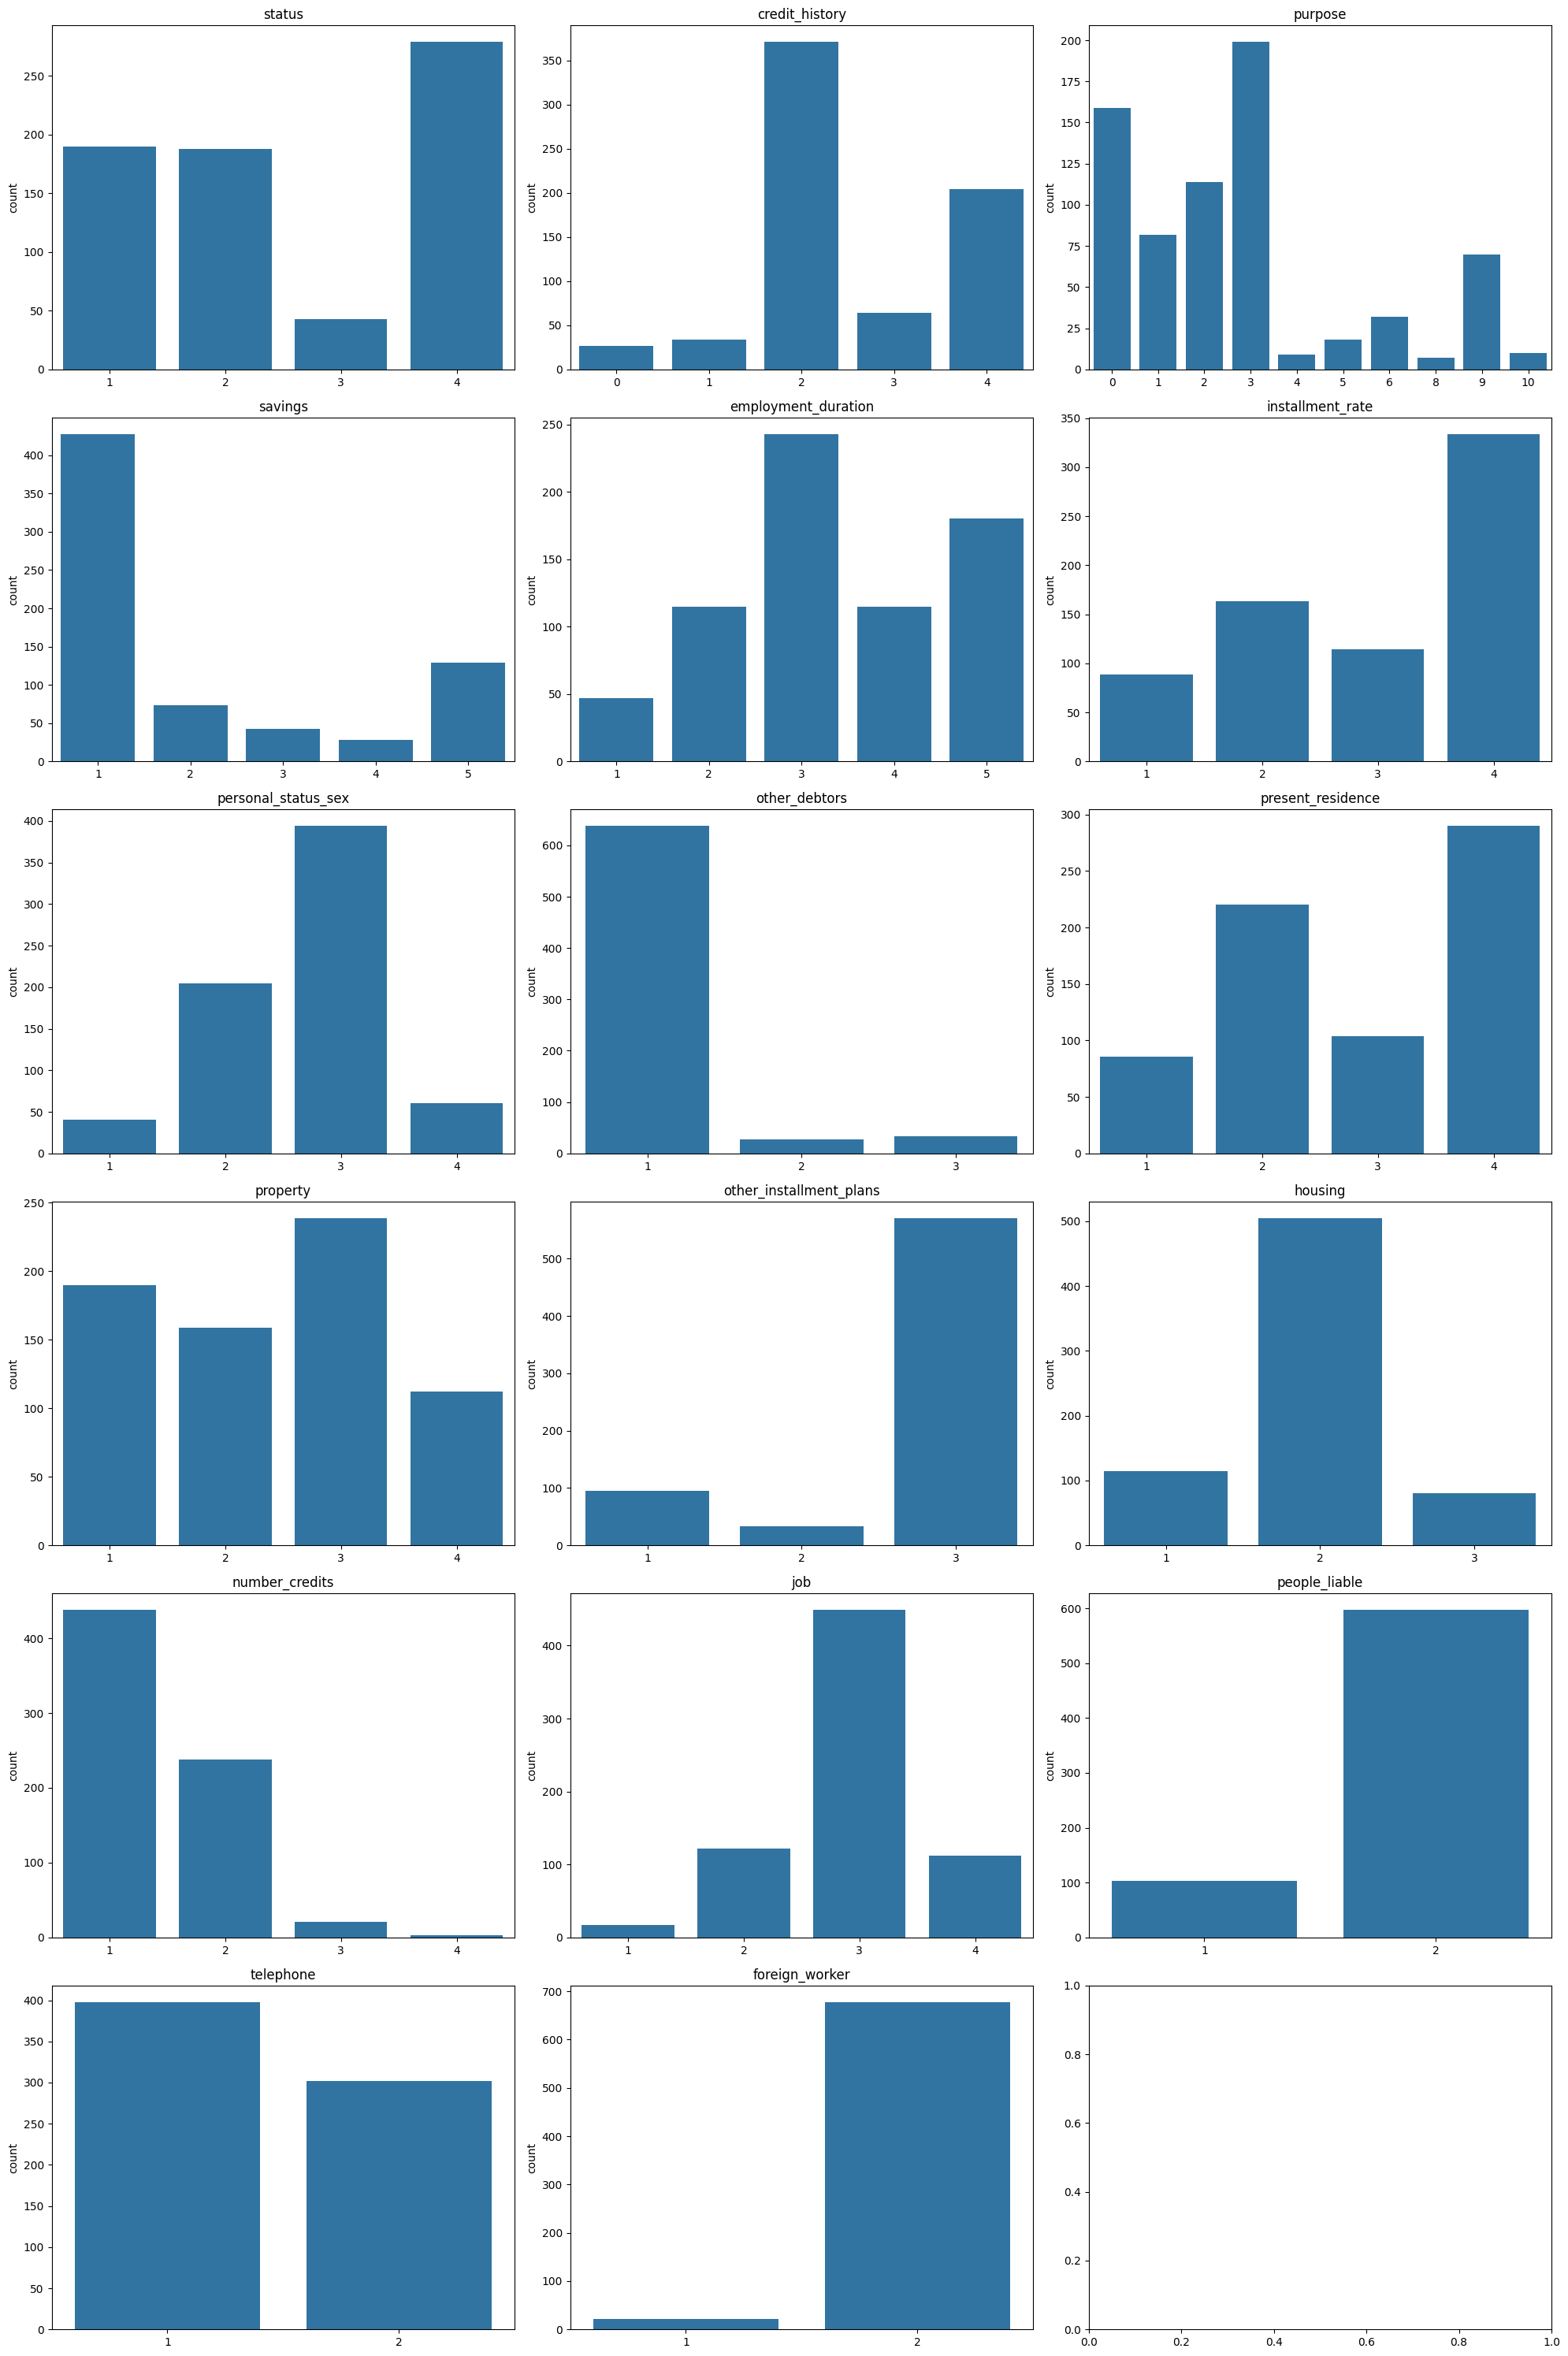

In [ ]:
# Creación figura y ejes.
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
axes = axes.ravel()

# Iteración sobre columnas numéricas y creación countplots.
for col, ax in zip(Xtrain[variables_categoricas], axes):
  sns.countplot(x = Xtrain[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

# Ajuste diseño figura.
plt.tight_layout()
plt.show()

Análisis de variables cuantitativas.

In [ ]:
# Estadísticas descriptivas variables cuantitativas.
df[variables_cuantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


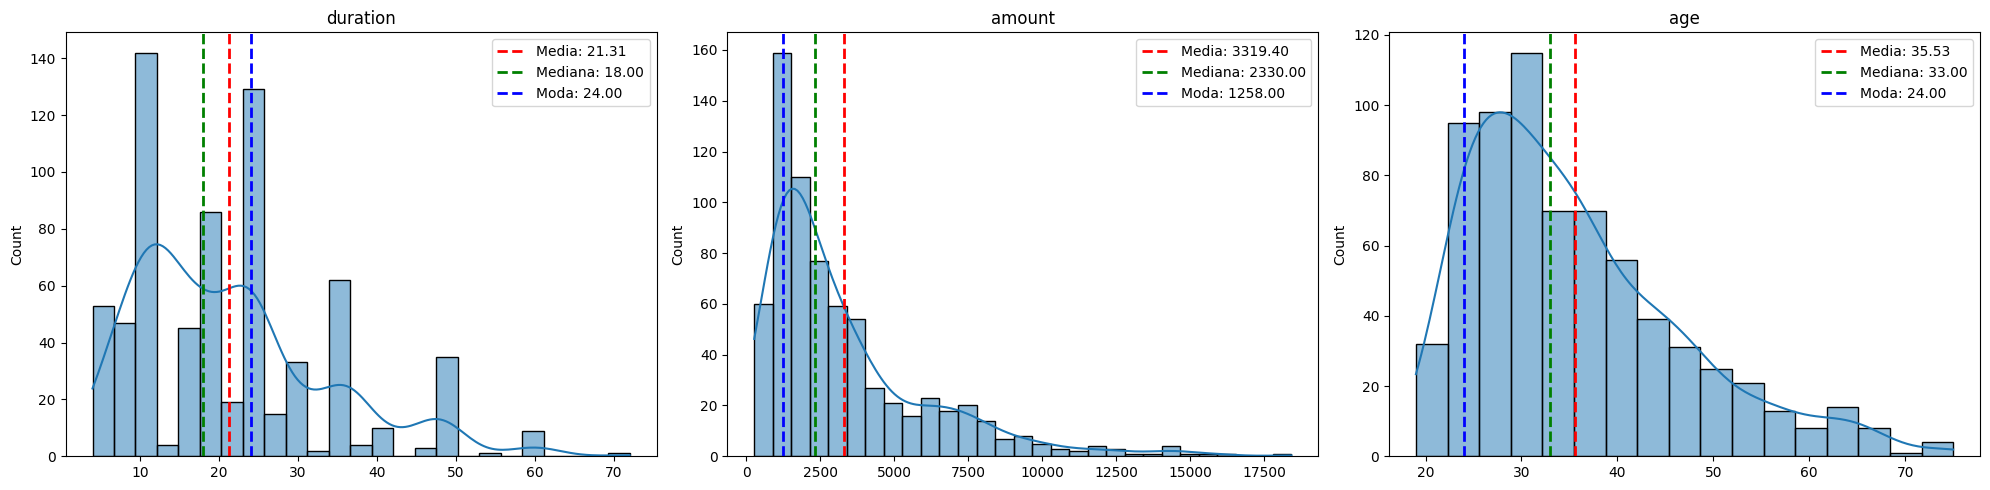

In [ ]:
# Creación figura y ejes.
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
axes = axes.ravel()

# Iteración sobre columnas numéricas y creación histogramas.
for col, ax in zip(Xtrain[variables_cuantitativas], axes):
    sns.histplot(Xtrain[col], ax = ax, kde = True)
    media = Xtrain[col].mean()
    mediana = Xtrain[col].median()
    moda = Xtrain[col].mode().values[0]  # Múltiples modas, se toma la primera.
    ax.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 2, label = f'Media: {media:.2f}')
    ax.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 2, label = f'Mediana: {mediana:.2f}')
    ax.axvline(moda, color = 'b', linestyle = 'dashed', linewidth = 2, label = f'Moda: {moda:.2f}')
    ax.legend()
    ax.set(title = f'{col}', xlabel = None)

# Ajuste diseño figura.
plt.tight_layout()
plt.show()


### **Se describe y se explica a continuación las transformaciones que se han decidido aplicar a cada columna:**


*   Variables Categóricas:

  1. En este caso todas las variables categoricas se encuentran en una forma numérica codificada. Sin embargo, se recomienda aplicar la transformación ordinal, incluso cuando las categorías ya están representadas por números. El aplicar esta transformación garantizará que los modelos interpreten correctamente las variables como categorías y no como variables cuantitativas discretas o continuas.

*   Variables Cuantitativas:

    1. A las variables cuantitativas se recomienda aplicar la transformación Box-Cox, ya que la distribución de sus datos no es normal o gausiana, por lo que esta transformación lleva la distribución de las variables a una forma más simétrica, es decir, normal o gaussiana.

    2. A las variables cuantitativas se recomienda aplicar un escalamiento para tener escalas similares y que todas sean igualmente competitivas en su relevancia en la construcción del modelo. En este caso se recomienda usar la Normalización Min-Max, ya que la distribución de los datos tienen una distribución no normal o no gaussiana.


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

Se utilizan las clases Pipeline() y ColumnTransformer() de Sklearn para definir y conjuntar todas las transformaciones que se han decidido aplicar a cada variable en el ejercicio anterior.

In [ ]:
# Transformaciones que se aplicarán a las variables usando la clase Pipeline de sklearn.

# Variables Numéricas:
# Definición del pipeline para las variables cuantitativas.
num_pipe = Pipeline(steps = [
    ('boxcox', PowerTransformer(method = 'box-cox', standardize = False)),
    ('minmax', MinMaxScaler())
])

num_pipe_nombres = variables_cuantitativas


# Variables Categóricas:
# Definición del pipeline para las variables categóricas.
cat_pipe = Pipeline(steps = [
    ('ordinal', OrdinalEncoder())
])

cat_pipe_nombres = variables_categoricas


# Se conjuntan las transformaciones de todos los tipos de variables y en dado caso
# se dejan inaletardas aquellas que se hayan decidido no transformar:

# Definición del preprocesamiento con ColumnTransformer.
columnasTransformer = ColumnTransformer( transformers = [
    ('num', num_pipe, num_pipe_nombres),
    ('cat', cat_pipe, cat_pipe_nombres)
], remainder = 'passthrough')

## **Ejercicio 7**

Se va a utilizar validación cruzada, por lo que se concatenan los conjuntos de entrenamiento y validación en un nuevo conjunto llamado trainval, que tendrá el mismo número de columnas, pero el total de renglones es la suma de ambos conjuntos.

In [ ]:
# Como se va a utilizar Validación-Cruzada, se concatenan los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que se llamará trainval para utilizar como entrenamiento:

# Concatenación de conjuntos de entrenamiento y validación.
Xtrainval = pd.concat([Xtrain, Xval], axis = 0)
ytrainval = pd.concat([ytrain, yval], axis = 0)

# Mostrar resultados.
print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

En este ejercicio se encontrarán los hiperparámetros de cada modelo que se consideren más adecuados para empezar a buscar los mejores modelos. Se debe buscar que no estén sobreentrenados o subentrenados los modelos.

In [ ]:
# Se define a continuación la función que se llama "mis_modelos" que incluye
# todos los modelos que se desean comparar en el ejercicio.
# Por el momento todos tienen sus argumentos predeterminados, pero se deberán
# ajustar de manera que todos los modelos converjan durante el entrenamiento
# y se puedan comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()

  # Se deberá incluir en cada modelo los argumentos que se consideren
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Se consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que se deseen ajustar.


  # Regresión Logística.
  modelos.append(LogisticRegression(max_iter = 1000, C = 0.1, solver = 'saga', penalty = 'l2', tol = 0.001))
  nombres.append('LR')

  # k-Vecinos más Cercanos.
  modelos.append(KNeighborsClassifier(n_neighbors = 21))
  nombres.append('kNN')

  # Árbol de Decisiones.
  modelos.append(DecisionTreeClassifier(max_depth = 3, min_samples_split = 20))
  nombres.append('DTree')

  # Bosque Aleatorio.
  modelos.append(RandomForestClassifier(n_estimators = 100, max_depth = 3, min_samples_split = 2, criterion = 'entropy'))
  nombres.append('RF')

  # XGBoosting.
  modelos.append(XGBClassifier(booster = 'gbtree', n_estimators = 100, max_depth = 3, learning_rate = 0.01, subsample = 1.0, objective = 'binary:logistic'))
  nombres.append('XGBoost')

  # Red Neuronal de Perceptrón Multicapa.
  modelos.append(MLPClassifier(hidden_layer_sizes = (20, 20), activation = 'logistic', max_iter = 1000, alpha = 0.1, solver = 'adam'))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte.
  modelos.append(SVC(kernel = 'rbf', C = 1, gamma = 'scale'))
  nombres.append('SVM')

  # Eliminar warnings de futuras versiones.
  warnings.filterwarnings("ignore")


  return modelos, nombres






# Se entrenan cada uno de los modelos y se desplegan la métricas de Train y Val.

# NOTA: Se observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test".

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Se define el pipeline con las transformaciones y los modelos.
  pipeline = Pipeline(steps = [('ct', columnasTransformer), ('m', modelos[i])])

  # Se aplica validación-cruzada.
  micv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

  # Se definen las métricas que se desan recuperar.
  mismetricas = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

  # Entrenamiento.
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring = mismetricas,
                          cv = micv,
                          return_train_score = True,
                          )

  # Se guarda el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Se despliegan los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento.
  print('>> %s' % nombres[i])
  for j, k in enumerate(list(scores.keys())):
    if j > 1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]), np.std(scores[k])))

>> LR
	 test_roc_auc 0.775 (0.033)
	 train_roc_auc 0.797 (0.007)
	 test_accuracy 0.749 (0.021)
	 train_accuracy 0.767 (0.008)
	 test_f1 0.490 (0.043)
	 train_f1 0.531 (0.019)
	 test_precision 0.641 (0.077)
	 train_precision 0.676 (0.021)
	 test_recall 0.402 (0.054)
	 train_recall 0.438 (0.019)
>> kNN
	 test_roc_auc 0.734 (0.042)
	 train_roc_auc 0.791 (0.012)
	 test_accuracy 0.727 (0.026)
	 train_accuracy 0.764 (0.011)
	 test_f1 0.419 (0.050)
	 train_f1 0.503 (0.028)
	 test_precision 0.592 (0.091)
	 train_precision 0.686 (0.028)
	 test_recall 0.328 (0.048)
	 train_recall 0.398 (0.028)
>> DTree
	 test_roc_auc 0.720 (0.040)
	 train_roc_auc 0.768 (0.011)
	 test_accuracy 0.744 (0.025)
	 train_accuracy 0.763 (0.012)
	 test_f1 0.466 (0.098)
	 train_f1 0.502 (0.093)
	 test_precision 0.635 (0.092)
	 train_precision 0.695 (0.065)
	 test_recall 0.385 (0.108)
	 train_recall 0.412 (0.110)
>> RF
	 test_roc_auc 0.783 (0.034)
	 train_roc_auc 0.846 (0.006)
	 test_accuracy 0.722 (0.010)
	 train_accuracy

## **Ejercicio 9**

De acuerdo a la información de la página de los datos antes de ser actualizados, se tiene una matriz de costo que pondera diferente los Falsos Positivos y los Falsos Negativos. Ver: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data De a cuerdo a esta información como una matriz de costo, se contesta las siguientes preguntas:

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, se contestan las siguientes preguntas:**


**a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Se justifica la respuesta.**

Para el banco es más costoso el error de Falsos Negativos, ya que clasificar un cliente de la Clase Negativa (Buen Cliente o Seguro) (0) cuando en realidad es de la Clase Positiva (Cliente Malo o Riesgoso) (1) puede resultar en pérdidas financieras por incumplimiento del pago del préstamo.

**b.   ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes? Se justifica la respuesta.**

Para detectar los Falsos Negativos, la métrica más importante es el **Recall**, ya que se calcula como el número de Verdaderos Positivos dividido entre la suma de Verdaderos Positivos y Falsos Negativos.

En el caso del banco se busca reducir los Falsos Negativos, para eliminar el riesgo de catalogar a un cliente como bueno o seguro cuando en realidad es malo o riesgoso. Lo que se busca es que el recall sea lo más alto posible (lo más cerca de 1), ya que esto va a indicar una cantidad muy baja o nula de Falsos Negativos.


**c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.**

Adicionalmente, la métrica de **Precisión en la Clase Positiva (Malos Clientes o 1)** se puede considerar, ya que aunque no se centra específicamente en los Falsos Negativos, es útil para verificar cuántos casos de malos clientes son identificados correctamente como tales. Además, la métrica **ROC** se puede considerar, ya que esta métrica evalúa la capacidad del modelo para distinguir entre las clase positiva y negativa en función de los valores de probabilidad predichos.


## **Ejercicio 10**

Se obtiene un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos, utilizando los resultados obtenidos con la métrica que se considera más importante en el ejercicio anterior. Es decir, en un mismo gráfico están los siete diagramas de caja. Se incluye conclusiones al respecto, en particular se indica cuáles se consideran que son los tres mejores modelos obtenidos.

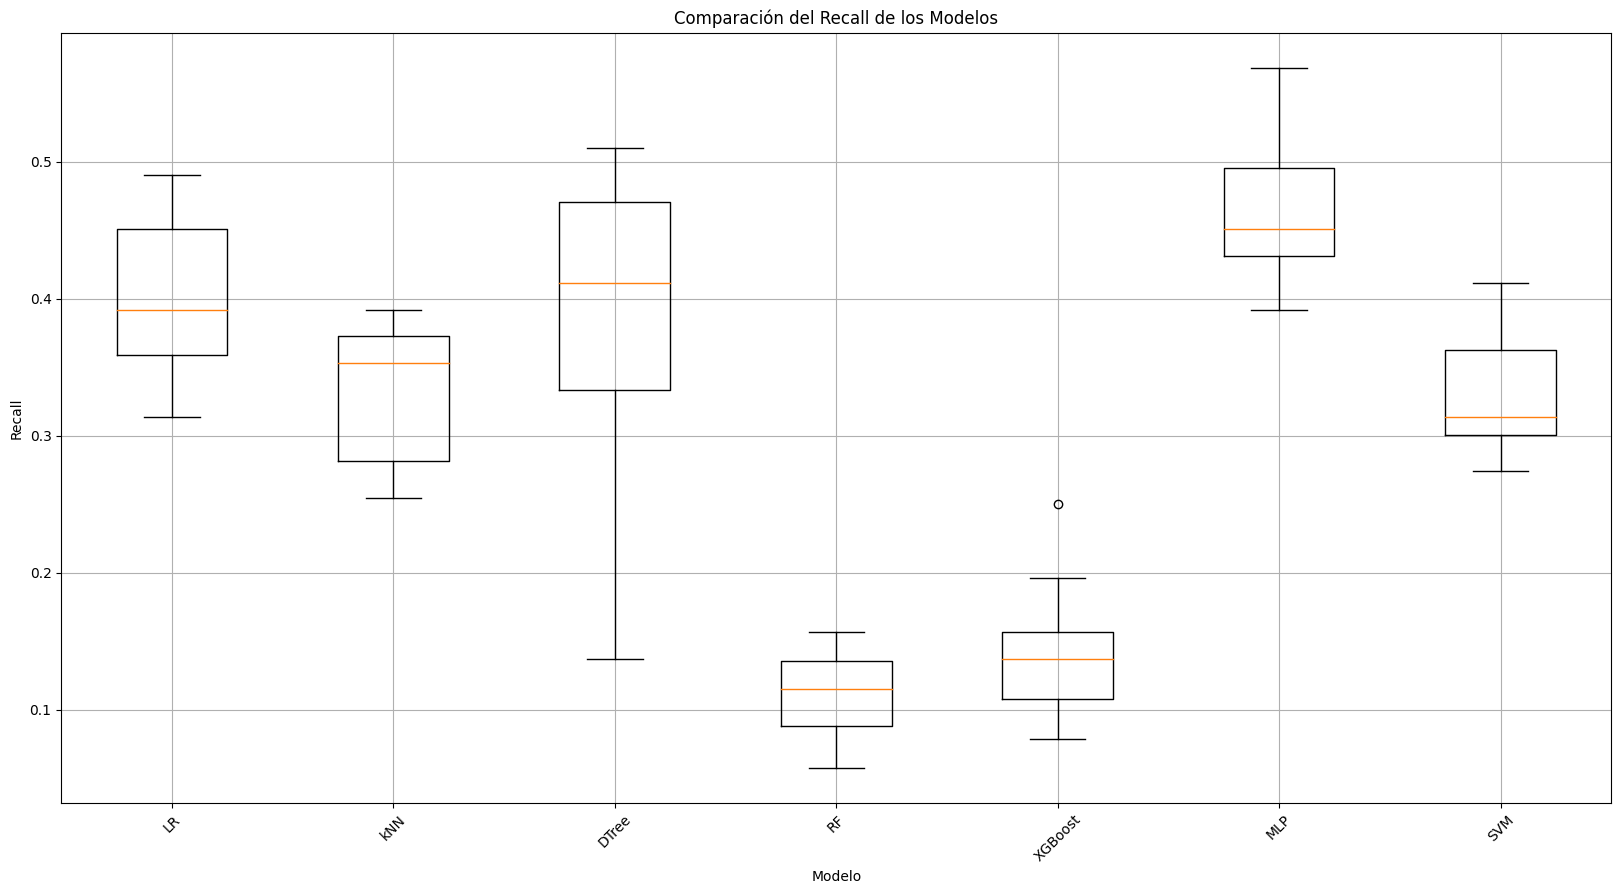

In [ ]:
# Se obtiene un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que se considera más importante
# en el ejercicio anterior:


# RECALL
# Lista para almacenar los recalls de cada modelo.
recalls = []

# Extraer los recalls de cada modelo.
for resultado in resultados:
    recalls_modelo = resultado['test_recall']
    recalls.append(recalls_modelo)

# Boxplot
plt.figure(figsize = (20, 10))
plt.boxplot(recalls)
plt.title('Comparación del Recall de los Modelos')
plt.xticks(range(1, len(nombres) + 1), nombres)
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

Despues de analizar los diagramas de caja de los modelos para la métrica recall (métrica que mide el error más costoso para el banco FN), se concluyó que los modelos que mostraron mejor rendimiento a base del Recall fueron el MLP, la Regresión Logística y el Árbol de Decisión.

# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

Se selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para clases no balanceadas que se considera adecuada, en combinación con los tres mejores modelos de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II. También se pueden incluir aquellas métricas que se consideraban importantes en el Ejercicio 9.

Se consulta la página de Sklearn (https://imbalanced-learn.org/stable/references/over_sampling.html) e igualmente los resultados presentados en la investigación del artículo de la IEEE (https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9239944) para la selección.

Se seleccionó la técnica de sobremuestreo **K-means
SMOTE**, ya que en base al artículo "An Investigation of Credit Card Default Prediction in the Imbalanced Datasets", está técnica ofrece los mejores resultados.

In [ ]:
# Se selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que se considere adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.


# Función para definir los modelos a utilizar.
def mis_modelos():

    # Listas para guardar modelos y sus nombres.
    modelos, nombres = list(), list()

    # Regresión Logística.
    modelos.append(LogisticRegression(max_iter = 1000, C = 0.1, solver = 'saga', penalty = 'l2', tol = 0.001))
    nombres.append('LR')

    # Red Neuronal de Perceptrón Multicapa.
    modelos.append(MLPClassifier(hidden_layer_sizes = (20, 20), activation = 'logistic', max_iter = 4000, alpha = 0.1, solver = 'adam'))
    nombres.append('MLP')

    # Árbol de Decisiones.
    modelos.append(DecisionTreeClassifier(max_depth = 3, min_samples_split = 20))
    nombres.append('DTree')

    return modelos, nombres

modelos, nombres = mis_modelos()
resultados = list()


# Se define el sobremuestreo K-means SMOTE.
smote = KMeansSMOTE()

# Se aplica el sobremuestreo K-means SMOTE a los datos de entrenamiento.
X_resampled, y_resampled = smote.fit_resample(Xtrainval, ytrainval)


for i in range(len(modelos)):

    # Se define el pipeline con las transformaciones y los modelos, incluyendo SMOTE.
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])

    # Se aplica validación-cruzada.
    micv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

    # Se definen las métricas que se desean recuperar.
    mismetricas = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

    # Se lleva a cabo el entrenamiento.
    scores = cross_validate(pipeline,
                            X_resampled,
                            y_resampled,
                            scoring = mismetricas,
                            cv = micv,
                            return_train_score = True)

    # Se guarda el resultado de cada modelo para análisis posteriores.
    resultados.append(scores)

    # Se despliegan los valores de las métricas para verificar si no hay
    # subentrenamiento o sobreentrenamiento.
    print('>> %s' % nombres[i])
    for j, k in enumerate(list(scores.keys())):
        if j > 1:
            print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]), np.std(scores[k])))

# Eliminar warnings de futuras versiones.
warnings.filterwarnings("ignore")

>> LR
	 test_roc_auc 0.873 (0.022)
	 train_roc_auc 0.884 (0.005)
	 test_accuracy 0.809 (0.022)
	 train_accuracy 0.817 (0.006)
	 test_f1 0.809 (0.023)
	 train_f1 0.818 (0.006)
	 test_precision 0.808 (0.022)
	 train_precision 0.815 (0.005)
	 test_recall 0.811 (0.036)
	 train_recall 0.821 (0.009)
>> MLP
	 test_roc_auc 0.888 (0.021)
	 train_roc_auc 0.966 (0.008)
	 test_accuracy 0.809 (0.025)
	 train_accuracy 0.908 (0.014)
	 test_f1 0.805 (0.029)
	 train_f1 0.906 (0.015)
	 test_precision 0.818 (0.026)
	 train_precision 0.928 (0.012)
	 test_recall 0.794 (0.041)
	 train_recall 0.884 (0.021)
>> DTree
	 test_roc_auc 0.868 (0.025)
	 train_roc_auc 0.889 (0.006)
	 test_accuracy 0.794 (0.023)
	 train_accuracy 0.815 (0.007)
	 test_f1 0.774 (0.027)
	 train_f1 0.796 (0.015)
	 test_precision 0.865 (0.068)
	 train_precision 0.893 (0.060)
	 test_recall 0.708 (0.065)
	 train_recall 0.726 (0.062)


# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Se slecciona y se justifica cuál se considera que es el mejor modelo que se ha obtenido hasta ahora.**

Los tres modelos seleccionados (MLP, Regresión Logística, Árbol de Decisión) tienen resultados similares; sin embargo, el modelo de Regresión Lineal es mejor que los otros dos modelos, especialmente en la métrica recall que fue marcada como la métrica con mayor aportación en el caso de identificación de Falsos Negativos (clasificación errónea como Clase Negativa (Buen Cliente o Seguro o 0)) en el problema de aprobaciones de créditos.

Debido a su mejor rendimiento en la métrica recall, el modelo de la Reggresión Logística se seleccionará para seguir trabajando con él e intentar mejorar todavía más el modelo para obtener mejores resultados.


## **Ejercicio 13**

Con el mejor modelo y utilizando la técnica de validación cruzada, se buscan los mejores hiperparámetros de dicho modelo y se despliegan todas las métricas que se han estado desplegando. Se verifica que el modelo no esté sobreentrenado y se indica cuáles son los mejores valores obtenidos de los hiperparámetros.

In [ ]:
# Con el mejor modelo y utilizando la técnica de validación cruzada, se buscan
# los mejores hiperparámetros de dicho modelo y se despliegan todas las métricas que
# se han estado desplegando. Se verifica que el modelo no esté sobreentrenado y se indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# Eliminar warnings de combinaciones de hiperparámetros no compatibles.
warnings.filterwarnings("ignore")

# Definir el modelo.
modelo_logistico = LogisticRegression(max_iter = 1000)

# Definir los hiperparámetros a ajustar.
param_grid = {
    'penalty': [None, 'l1', 'l2'],  # Tipo de regularización.
    'C': [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización.
    'class_weight': [None, 'balanced'],  # Peso de clase para manejar desbalance.
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algoritmo de optimización.
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerancia para la convergencia.
}

# Métrica de evaluación (media ponderada de recall y accuracy).
def balanced_accuracy_recall(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return (2 * recall + accuracy) / 3  # Media ponderada

# Convertir la función en un scorer de sklearn
scorer = make_scorer(balanced_accuracy_recall)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator = modelo_logistico, param_grid = param_grid, scoring = scorer, cv = 5, n_jobs = -1)
grid_result = grid_search.fit(Xtrainval, ytrainval)

# Mostrar los mejores resultados
print("Mejor puntaje balanceado de recall y accuracy:", grid_result.best_score_)
print("Mejores Hiperparámetros:", grid_result.best_params_)





# Se define el modelo MLP con sus hiperparámetros
modelo_final = LogisticRegression(max_iter = 1000, C = 0.01, class_weight = 'balanced', penalty = 'l1', solver = 'saga', tol = 0.01)

# Se define el sobremuestreo K-means SMOTE.
smote = KMeansSMOTE()

# Se aplica el sobremuestreo K-means SMOTE a los datos de entrenamiento.
X_resampled, y_resampled = smote.fit_resample(Xtrainval, ytrainval)

# Se define el pipeline con las transformaciones y el modelo MLP, incluyendo SMOTE.
pipeline = Pipeline(steps = [('ct', columnasTransformer), ('m', modelo_final)])

# Se aplica validación-cruzada.
micv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

# Se definen las métricas que se desean recuperar.
mismetricas = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Se lleva a cabo el entrenamiento.
scores = cross_validate(pipeline,
                        X_resampled,
                        y_resampled,
                        scoring = mismetricas,
                        cv = micv,
                        return_train_score = True)

# Se despliegan los valores de las métricas para verificar si no hay
# subentrenamiento o sobreentrenamiento.
print('>> LR')
for j, k in enumerate(list(scores.keys())):
    if j > 1:
        print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]), np.std(scores[k])))

Mejor puntaje balanceado de recall y accuracy: 0.7673202614379084
Mejores Hiperparámetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
>> LR
	 test_roc_auc 0.822 (0.032)
	 train_roc_auc 0.825 (0.007)
	 test_accuracy 0.741 (0.028)
	 train_accuracy 0.757 (0.012)
	 test_f1 0.749 (0.030)
	 train_f1 0.764 (0.013)
	 test_precision 0.728 (0.031)
	 train_precision 0.743 (0.009)
	 test_recall 0.773 (0.050)
	 train_recall 0.787 (0.023)


## **Ejercicio 14**

El mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior, se utilizan ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

a. Obtener los valores de todas las métricas que se han estado desplegando.

In [ ]:
# 14.	El mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# se utilizan ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.

# Ajustar el pipeline a los datos de entrenamiento.
pipeline.fit(Xtrainval, ytrainval)

# Hacer predicciones en el conjunto de prueba.
y_pred_test = pipeline.predict(Xtest)

print(classification_report(ytest, y_pred_test))

# Calcular métricas en el conjunto de prueba.
test_accuracy = accuracy_score(ytest, y_pred_test)
test_precision = precision_score(ytest, y_pred_test)
test_recall = recall_score(ytest, y_pred_test)
test_f1 = f1_score(ytest, y_pred_test)
test_roc_auc = roc_auc_score(ytest, y_pred_test)

# Mostrar resultados.
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)
print("Test ROC AUC:", test_roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.59      0.71       106
           1       0.45      0.80      0.57        44

    accuracy                           0.65       150
   macro avg       0.66      0.69      0.64       150
weighted avg       0.75      0.65      0.67       150

Test Accuracy: 0.6533333333333333
Test Precision: 0.44871794871794873
Test Recall: 0.7954545454545454
Test F1-score: 0.5737704918032787
Test ROC AUC: 0.6948970840480274


b. Obtener la matriz de confusión.

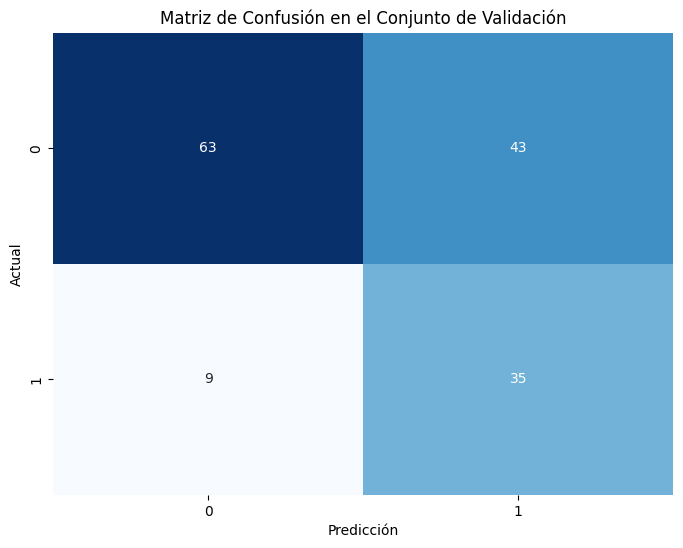


Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       106
           1       0.45      0.80      0.57        44

    accuracy                           0.65       150
   macro avg       0.66      0.69      0.64       150
weighted avg       0.75      0.65      0.67       150



In [ ]:
# b.	Obtener la matriz de confusión.


# Matrtiz de confusión.
matriz_confusion = confusion_matrix(ytest, y_pred_test)

# Crear mapa de calor.
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_confusion, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

# Añadir etiquetas y título.
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión en el Conjunto de Validación')

# Mostrar gráfica.
plt.show()

# Mostrar informe de clasificación.
print('\nReporte de Clasificación en el conjunto de validación:')
print(classification_report(ytest, y_pred_test))

c. Se realiza un análisis de importancia de variables (feature importance) de este mejor modelo con el conjunto de prueba (test) y se incluyen conclusiones al respecto.

In [ ]:
# c.	Se realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) y se incluyen conclusiones al respecto.


# Obtener los coeficientes de la regresión logística.
coeficientes = pipeline.named_steps['m'].coef_

# Obtener los nombres de las columnas transformadas.
nombres_columnas = pipeline.named_steps['ct'].get_feature_names_out()


# Crear un DataFrame con los coeficientes y sus nombres de columna correspondientes.
importance_df = pd.DataFrame({'Feature': nombres_columnas, 'Coefficient': coeficientes.flatten()})

# Ordenar los coeficientes por valor absoluto para obtener la importancia relativa de las características.
importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by = 'Absolute_Coefficient', ascending = False)

# Arreglar indice del DataFrame con los coedicientes.
importance_df.reset_index(drop = True, inplace = True)
importance_df.index = range(1, len(importance_df) + 1)

# Mostrar el DataFrame de importancia de características
print(importance_df)

                         Feature  Coefficient  Absolute_Coefficient
1                    cat__status    -0.313239              0.313239
2                   cat__savings    -0.020338              0.020338
3            cat__credit_history    -0.006446              0.006446
4                  num__duration     0.000000              0.000000
5                  cat__property     0.000000              0.000000
6                 cat__telephone     0.000000              0.000000
7             cat__people_liable     0.000000              0.000000
8                       cat__job     0.000000              0.000000
9            cat__number_credits     0.000000              0.000000
10                  cat__housing     0.000000              0.000000
11  cat__other_installment_plans     0.000000              0.000000
12            cat__other_debtors     0.000000              0.000000
13        cat__present_residence     0.000000              0.000000
14                   num__amount     0.000000   

Después de realizar un análisis de importancia de variables (feature importance) del mejor modelo (Regresión Lineal) con el conjunto de prueba (test), se concluyó que las tres variables que afectan en la predicción de si un cliente es bueno o malo para un crédito bancario son:


1. status (estado de la cuenta corriente existente).
2. savings (ahorros).
3. credit_history (historial crediticio).


Estas 3 variables son las que ayudan al modelo a poder predecir el credir_risk (riesgo crediticio) que un banco corre al prestarle dinero a un cierto cliente.

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

Después de haber investigado el problema, implementado varios algoritmos, técnicas y modelos de aprendizaje automático (aprendizaje supervisado), para poder predecir si un cliente es bueno o malo al solicitar un crédito bancario, se llegó a las siguientes conclusiones:


1. La métrica que más importó al evaluar los modelos fue el Recall, ya que para el banco es más costoso el error de Falsos Negativos, ya que clasificar un cliente de la Clase Negativa (Buen Cliente o Seguro) (0) cuando en realidad es de la Clase Positiva (Cliente Malo o Riesgoso) (1) puede resultar en pérdidas financieras por incumplimiento del pago del préstamo.


2. A las variables categóricas era necesario aplicarles una transformación, ya que se encontraban en una forma numérica codificada. Se les aplicó la transformación ordinal, incluso cuando las categorías ya estaban representadas por números, ya que al aplicar esta transformación se garantizó que los modelos interpretaran correctamente las variables como categorías y no como variables cuantitativas discretas o continuas.


3. A las variables cuantitativas era necesario aplicarles la transformación Box-Cox, ya que la distribución de sus datos no era normal o gausiana, por lo que esta transformación llevó la distribución de las variables a una forma más simétrica, es decir, normal o gaussiana. Adicionalmente, a las variables cuantitativas era necesario aplicarles un escalamiento para tener escalas similares y que todas fueran igualmente competitivas en su relevancia en la construcción del modelo. En este caso se usó la Normalización Min-Max, ya que la distribución de los datos tenía una distribución no normal o no gaussiana.


4. De los 7 modelos distintos que se aplicaron utilizando una Validación Cruzada (Regresión Logística, k-Vecinos más cercanos, Árbol de Decisiones, Bosque Aleatorio, XGBoosting, Red Neuronal de Perceptrón Multicapa, Máquina de Vectores de Soporte), los modelos que mejores resultados mostraron, especialmente en la métrica de Recall, fueron la Red Neuronal de Perceptrón Multicapa, la Regresión Logística y el Árbol de Decisiones.


5. De las técnicas de sobremuestreo, submuestreo y sobremoestreo+submuestreo, la que mejores resultados ofreció fue la técnica de sobremuestreo K-means SMOTE.

6. Las variables más importantes para este problema fueron status, savings y credit_history.

7. Finalmente, la aplicación de técnicas y modelos que mejores resultados ofrecieron con respecto al Recall de la Clase Positiva fueron la regresión logística (Hiperparámetros = {C: 0.01, class_weight: 'balanced', penalty: 'l1', solver: 'saga', tol: 0.01}) con entrenamiento de Validación Cruzada y la técnica de sobremuestreo K-means SMOTE. La aplicación de las técnicas y modelos anteriores permitieron que se llegara a un 0.80 o un 80% de Recall, lo cual se puede ver reflejado en la matriz de confusión que indica que solamente 9 de 150 casos fueron erroneamente clasificados como buenos clientes (Clase Negativa o 0) cuando en realidad eran malos clientes (Clase Positiva o 1).

8. Se buscó el mejor balance entre las métricas de Recall y Accuracy, lo cual se puede ver reflejado en la métrica F1-Score.
